<a href="https://colab.research.google.com/github/lmdss1294/My_section1_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url ="https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(url)

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.drop_duplicates(subset='Name', keep='first',inplace =False)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16586,16587,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000.0,Sports,Konami Digital Entertainment,0.00,0.00,0.08,0.01
16589,16590,Namco Soccer Prime Goal,PS,1995.0,Sports,Sony Computer Entertainment,0.00,0.00,0.12,0.01
16590,16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00
16592,16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.00,0.02,0.00


데이터를 분석해보면 년도에 따른 부분보다는 장르, 그리고 플랫폼으로 구분하는 것이 더 좋다는 판단이 들었다. 또한 이름을 드랍하고 unnamed column을 드랍한다.df.drop으로 순살해주마. 그런다음 NA와 EU JP Other을 모두 더한 total sales column을 만든다.

 지역은 어떻게 구분했는지 설명함

 지역별로 선호하는 게임의 장르를 파악함
 
 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

In [ ]:
L = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in L:
  df[i] = df[i].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
  df[i]=df[i].astype('float')


<ipython-input-142-163c703bb5b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
<ipython-input-142-163c703bb5b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].astype('float')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
L

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
Genre,,,,,
Action,0.265046,0.158531,0.048333,0.056787,0.528698
Adventure,0.080276,0.050205,0.040907,0.013170,0.184558
Fighting,0.263892,0.119641,0.104359,0.043293,0.531186
Misc,0.234819,0.123825,0.061975,0.043212,0.463831
Platform,0.510172,0.229817,0.149519,0.058935,0.948442
Puzzle,0.214806,0.089170,0.099364,0.021979,0.425318
Racing,0.290976,0.192797,0.046202,0.062765,0.592740
Role-Playing,0.217584,0.124976,0.234082,0.038724,0.615365
Shooter,0.448813,0.242367,0.029828,0.079578,0.800586


In [ ]:
L = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()

<ipython-input-152-3a603bbd544b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  L = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()


In [ ]:
L["Total_sales"] = L.sum(axis=1)

In [ ]:
NA_Sales = L['NA_Sales'].sort_values(ascending = False)

In [ ]:
EU_Sales=L['EU_Sales'].sort_values(ascending = False)

In [ ]:
JP_Sales=L['JP_Sales'].sort_values(ascending = False)

In [ ]:
Other_Sales=L['Other_Sales'].sort_values(ascending = False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
NA_Sales

Genre
Platform        0.510172
Shooter         0.448813
Racing          0.290976
Sports          0.290239
Action          0.265046
Fighting        0.263892
Misc            0.234819
Role-Playing    0.217584
Puzzle          0.214806
Simulation      0.214456
Strategy        0.101390
Adventure       0.080276
Name: NA_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7f4a729093d0>,
 [Text(0.9591273723580147, 0.5385858182254806, 'Platform'),
  Text(0.10692774016114878, 1.094790600244645, 'Shooter'),
  Text(-0.6609514771140679, 0.8792855877931424, 'Racing'),
  Text(-1.0358120180555639, 0.3702613445279704, 'Sports'),
  Text(-1.0750020453037117, -0.23317504710589615, 'Action'),
  Text(-0.8092846923825168, -0.7450223397156192, 'Fighting'),
  Text(-0.35286115506718346, -1.0418680363868802, 'Misc'),
  Text(0.1395037131658896, -1.0911181026877563, 'Role-Playing'),
  Text(0.5850620564639326, -0.9315054428645031, 'Puzzle'),
  Text(0.9204274678614386, -0.6023398346499927, 'Simulation'),
  Text(1.0622601545089903, -0.28566302550826633, 'Strategy'),
  Text(1.0964369327800938, -0.0884649785835049, 'Adventure')],
 [Text(0.5231603849225535, 0.2937740826684439, '16.3%'),
  Text(0.05832422190608115, 0.5971585092243518, '14.3%'),
  Text(-0.36051898751676426, 0.47961032061444125, '9.3%'),
  Text(-0.564988373484853, 0.20196073337889292,

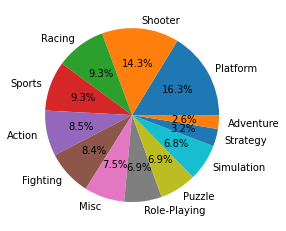

In [ ]:

plt.pie(NA_Sales,labels = NA_Sales.index,autopct='%.1f%%')

미국에서는 플랫폼게임이 인기가 있다는 것을 알 수 있다

([<matplotlib.patches.Wedge at 0x7f4a72920dc0>,
 [Text(0.8271450448419675, 0.7251421066200608, 'Role-Playing'),
  Text(-0.3549101958298899, 1.0411718171829227, 'Platform'),
  Text(-0.9848652774446587, 0.48993916488055494, 'Fighting'),
  Text(-1.0850943545779566, -0.1804722739454674, 'Puzzle'),
  Text(-0.8404103861350114, -0.7097255687069484, 'Simulation'),
  Text(-0.44137574173200383, -1.0075651118466358, 'Strategy'),
  Text(0.003699476440833893, -1.0999937790160743, 'Misc'),
  Text(0.4020524098120373, -1.0238915273427813, 'Sports'),
  Text(0.7111891210517577, -0.8391722314862596, 'Action'),
  Text(0.921868397352736, -0.6001322004044594, 'Racing'),
  Text(1.0478273174098072, -0.3347505233599608, 'Adventure'),
  Text(1.095376433377899, -0.10074953697319483, 'Shooter')],
 [Text(0.4511700244592549, 0.39553205815639675, '22.9%'),
  Text(-0.1935873795435763, 0.5679119002815941, '14.6%'),
  Text(-0.537199242242541, 0.2672395444803027, '10.2%'),
  Text(-0.5918696479516127, -0.0984394221520731

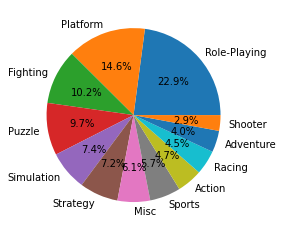

In [ ]:

plt.pie(JP_Sales,labels = JP_Sales.index,autopct='%.1f%%')

일본에서는 롤플레잉 게임이 인기가 많다는 것을 알 수 있었다.

([<matplotlib.patches.Wedge at 0x7f4a72854df0>,
 [Text(0.9906445123867483, 0.4781458460323814, 'Shooter'),
  Text(0.2668544883448541, 1.067140422835817, 'Platform'),
  Text(-0.5646676940418419, 0.9440076246013425, 'Racing'),
  Text(-1.0237052830743398, 0.40252638845880157, 'Sports'),
  Text(-1.07375459694116, -0.23885364880555515, 'Action'),
  Text(-0.796701013488145, -0.7584639049466776, 'Simulation'),
  Text(-0.35676387714722074, -1.040538099236584, 'Role-Playing'),
  Text(0.14403064554588152, -1.09052976719741, 'Misc'),
  Text(0.6056143387623385, -0.9182762507467215, 'Fighting'),
  Text(0.9076561672443398, -0.6214179608470574, 'Puzzle'),
  Text(1.0473657963248717, -0.33619174393308265, 'Strategy'),
  Text(1.0952313006467929, -0.10231518989639114, 'Adventure')],
 [Text(0.5403515522109535, 0.26080682510857167, '14.3%'),
  Text(0.14555699364264768, 0.582076594274082, '13.6%'),
  Text(-0.30800056038645923, 0.5149132497825504, '11.4%'),
  Text(-0.5583846998587307, 0.2195598482502554, '9.

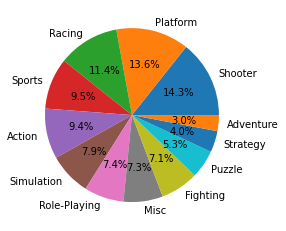

In [ ]:
plt.pie(EU_Sales,labels = EU_Sales.index,autopct='%.1f%%')

유럽에서는 슈팅게임이 인기가 많다는 것을 알 수 있었다.

([<matplotlib.patches.Wedge at 0x7f4a720ec520>,
 [Text(0.9797952291689154, 0.5000013088961196, 'Shooter'),
  Text(0.27736755897193094, 1.064456310625266, 'Racing'),
  Text(-0.49495465470658057, 0.9823542588009122, 'Platform'),
  Text(-1.0073961548697845, 0.44176123319455446, 'Sports'),
  Text(-1.061655477135658, -0.2879021498145822, 'Action'),
  Text(-0.719141993972004, -0.8323669818691576, 'Fighting'),
  Text(-0.21811453586004936, -1.0781586382562427, 'Misc'),
  Text(0.31057673059432095, -1.055245039985189, 'Role-Playing'),
  Text(0.7379464991126429, -0.8157419717333382, 'Simulation'),
  Text(0.9728430688185155, -0.5133968868738624, 'Puzzle'),
  Text(1.0642285063047427, -0.27824033921841096, 'Strategy'),
  Text(1.0966473964754235, -0.08581659398784959, 'Adventure')],
 [Text(0.5344337613648629, 0.27272798667061066, '15.0%'),
  Text(0.1512913958028714, 0.5806125330683268, '11.8%'),
  Text(-0.26997526620358936, 0.5358295957095884, '11.1%'),
  Text(-0.5494888117471551, 0.24096067265157514

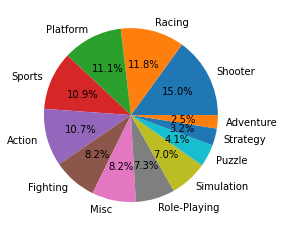

In [ ]:
plt.pie(Other_Sales,labels = Other_Sales.index,autopct='%.1f%%')

다른 국가에서는 슈팅게임이 가장 인기가 많다는 것을 알 수 있다.

Total_Sales=L['Total_sales'].sort_values(ascending = False)

Total_Sales=L['Total_sales'].sort_values(ascending = False)

In [ ]:
Total_Sales=L['Total_sales'].sort_values(ascending = False)

([<matplotlib.patches.Wedge at 0x7f4a71e896a0>,
 [Text(0.9821019203869427, 0.49545516242368454, 'Platform'),
  Text(0.26355394449378805, 1.0679603542930634, 'Shooter'),
  Text(-0.48398983720608707, 0.9878025295985152, 'Role-Playing'),
  Text(-0.954567173677116, 0.546627396805249, 'Racing'),
  Text(-1.0985333647633309, -0.05678420996857287, 'Sports'),
  Text(-0.9121770331664059, -0.6147626047213135, 'Fighting'),
  Text(-0.48404084189909297, -0.9877775373906907, 'Action'),
  Text(0.036630841680584614, -1.0993899132872615, 'Misc'),
  Text(0.516214008993608, -0.9713511707506959, 'Simulation'),
  Text(0.8782731781575545, -0.6622961758375395, 'Puzzle'),
  Text(1.0478305808047315, -0.33474030819490386, 'Strategy'),
  Text(1.095456729784553, -0.0998726848028696, 'Adventure')],
 [Text(0.5356919565746959, 0.2702482704129188, '14.9%'),
  Text(0.14375669699661164, 0.5825238296143982, '12.6%'),
  Text(-0.26399445665786564, 0.5388013797810083, '9.6%'),
  Text(-0.5206730038238814, 0.2981603982574085,

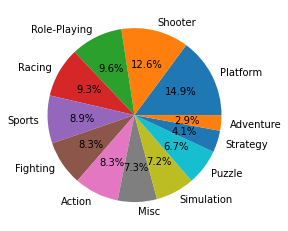

In [ ]:
plt.pie(Total_Sales,labels = Total_Sales.index,autopct='%.1f%%')

모든 국가에서 플랫폼 게임이 가장 인기가 많다는 것을 알 수 있다.